In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv('final_df.csv')

In [3]:
data.head()

,Unnamed: 0,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,1,Tecia Torres,154.94,52,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,2,Loma Lookboonmee,154.94,52,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.columns

Index(['fighter_name', 'Height_cm', 'Weight_kg', 'Reach_cm', 'Stance', 'SLpM',
       'Str_Acc%', 'Strikes_absorbed/m', 'Str_Def%', 'TD_Avg', 'TD_Def%',
       'Sub_Avg', 'weight_class', 'TD_Acc'],
      dtype='object')

In [6]:
data = data.drop(columns=['Stance', 'Sub_Avg','Str_Def%','Str_Acc%','Str_Acc%'])
#  TD_Avg    0.076277
# 3                 SLpM    0.067120
# 5   Strikes_absorbed/m    0.055352
# 6             Str_Def%    0.052991
# 4             Str_Acc%    0.051634
# 9              Sub_Avg    0.033627

In [7]:
data.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,SLpM,Strikes_absorbed/m,TD_Avg,TD_Def%,weight_class,TD_Acc
0,Felice Herrig,162.56,52,65,3.63,4.84,1.18,72.0,Straw Weight,30.0
1,Tecia Torres,154.94,52,60,4.30,3.37,0.68,56.0,Straw Weight,15.0
2,Loma Lookboonmee,154.94,52,61,5.16,3.09,0.67,72.0,Straw Weight,25.0
3,Amanda Lemos,162.56,52,65,6.21,5.39,1.98,100.0,Straw Weight,100.0
4,Carla Esparza,154.94,52,63,2.29,2.85,3.44,48.0,Straw Weight,35.0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding a column named 'weather'
label_encoder = LabelEncoder()
data['weight_class_encoded'] = label_encoder.fit_transform(data['weight_class'])

In [9]:
X = data.drop(columns=['fighter_name','weight_class', 'weight_class_encoded'])
y = data['weight_class_encoded']

In [10]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Linear activation for regression
])

c:\Users\H\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [47]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, 
                    validation_split=0.2, verbose=1)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.1676 - mae: 1.6480 - val_loss: 1.9242 - val_mae: 1.1045
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8355 - mae: 1.0993 - val_loss: 1.9770 - val_mae: 1.2116
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8510 - mae: 1.1066 - val_loss: 1.8790 - val_mae: 1.0444
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7691 - mae: 1.0563 - val_loss: 1.8207 - val_mae: 1.0576
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7663 - mae: 1.0696 - val_loss: 1.7995 - val_mae: 1.0520
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6814 - mae: 1.0321 - val_loss: 1.7879 - val_mae: 1.0167
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6303 - mae: 0.9987 - val_loss: 1.6954 - val_mae: 1.0066
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7099 - mae: 1.0106 - val_loss: 1.7819 - val_mae: 0.9500
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [48]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Loss (MSE): {loss:.4f}')
print(f'Test MAE: {mae:.4f}')


Test Loss (MSE): 0.5320
Test MAE: 0.1914


In [56]:
# Make predictions
predictions = model.predict(X_test)

# Display sample predictions
print("\nSample Predictions vs Actual:")
for i in range(10):
    print(f"Predicted weight class: {predictions[i][0]:.2f}, Actual weight class: {y_test.iloc[i]:.2f}\n")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Sample Predictions vs Actual:
Predicted weight class: 4.03, Actual weight class: 4.00

Predicted weight class: 4.48, Actual weight class: 5.00

Predicted weight class: 3.03, Actual weight class: 3.00

Predicted weight class: 3.03, Actual weight class: 3.00

Predicted weight class: 4.07, Actual weight class: 4.00

Predicted weight class: 3.05, Actual weight class: 3.00

Predicted weight class: 3.07, Actual weight class: 3.00

Predicted weight class: 4.00, Actual weight class: 4.00

Predicted weight class: 3.05, Actual weight class: 3.00

Predicted weight class: 4.04, Actual weight class: 4.00



In [50]:
from sklearn.metrics import accuracy_score

# Convert predictions to integers (rounding to the nearest class)
predicted_classes = predictions.round().astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 94.74%


In [51]:
import matplotlib.pyplot as plt

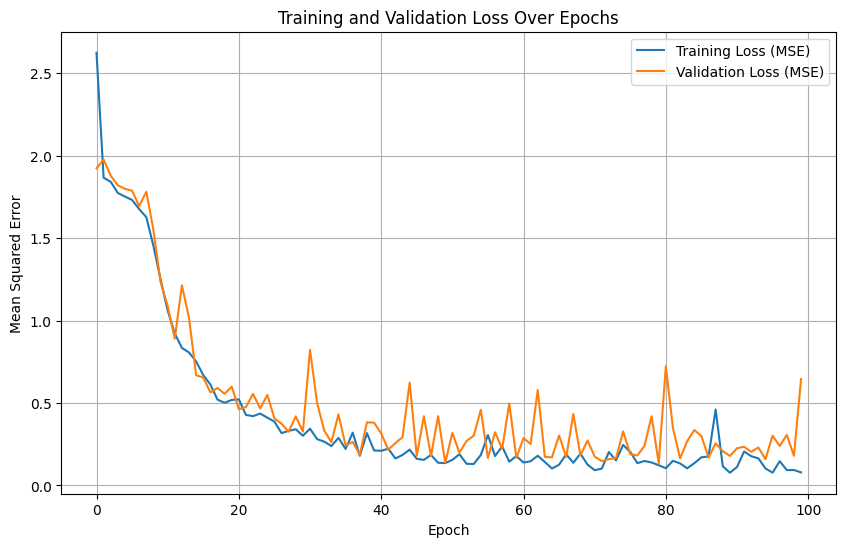

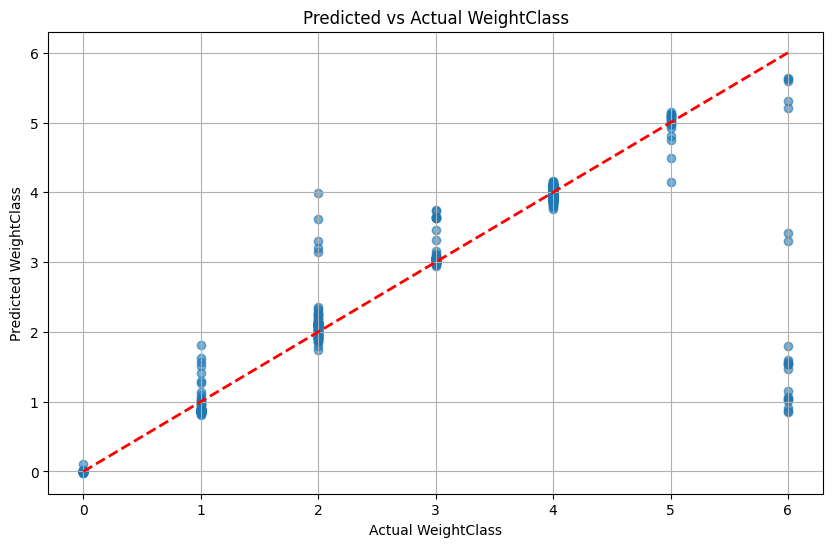

In [52]:
# 1. Training and Validation Loss Plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')
plt.show()

# 2. Predicted vs Actual Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual WeightClass')
plt.xlabel('Actual WeightClass')
plt.ylabel('Predicted WeightClass')
plt.grid(True)
plt.savefig('pred_vs_actual.png')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

# Convert predictions to integers (rounding to the nearest class)
predicted_classes = predictions.round().astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 94.74%
